## Netlfix Exploratory Data Analysis

![netflix](img.jpeg)

In [1]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb
import missingno as mno

%matplotlib inline

In [2]:
netflix_df = pd.read_csv('netflix_titles.csv', index_col = False)

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


<AxesSubplot:>

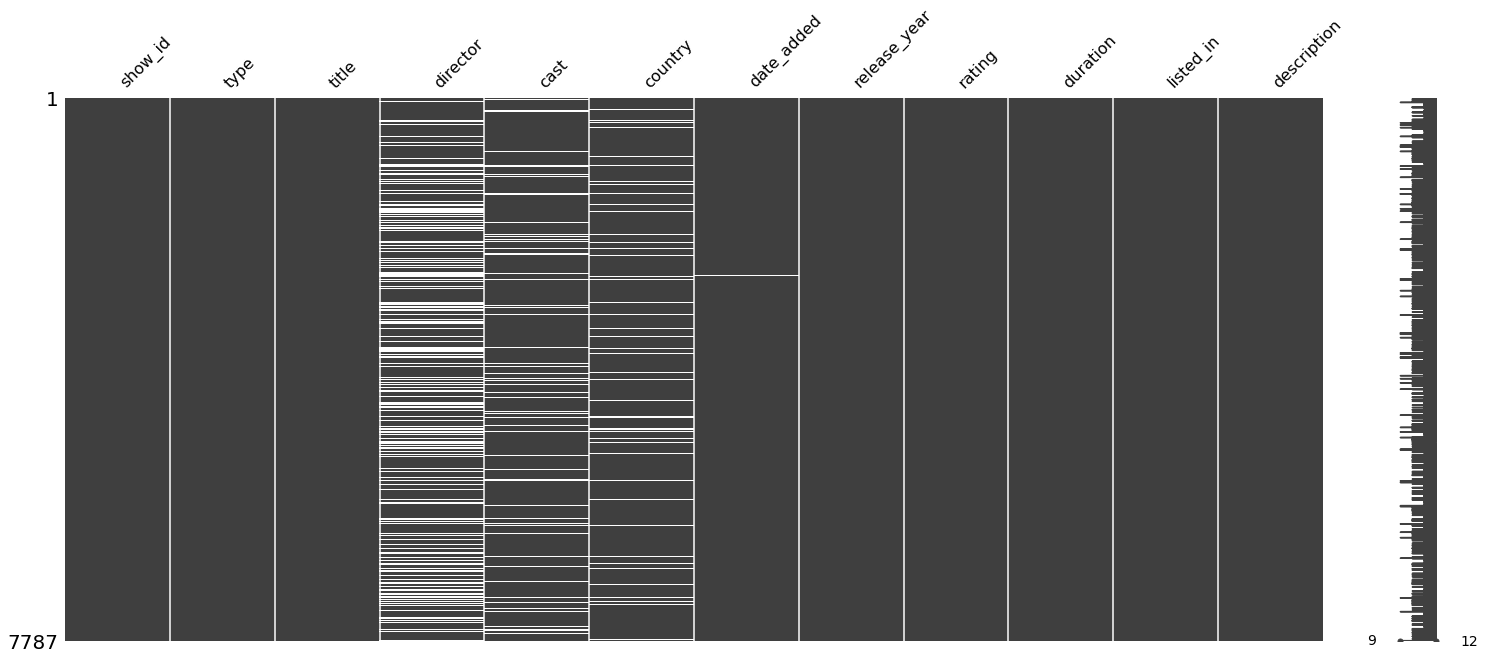

In [4]:
mno.matrix(netflix_df)

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
clean_df = netflix_df.drop(['show_id','director','cast'], axis = 1)

In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   country       7280 non-null   object
 3   date_added    7777 non-null   object
 4   release_year  7787 non-null   int64 
 5   rating        7780 non-null   object
 6   duration      7787 non-null   object
 7   listed_in     7787 non-null   object
 8   description   7787 non-null   object
dtypes: int64(1), object(8)
memory usage: 547.6+ KB


In [9]:
clean_df['year'] = pd.DatetimeIndex(clean_df['date_added']).year.fillna(2009).astype('object')
# filling 10 NaN values from TV Shows to 2009 which was a year that actually had 0 TV Shows added
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   country       7280 non-null   object
 3   date_added    7777 non-null   object
 4   release_year  7787 non-null   int64 
 5   rating        7780 non-null   object
 6   duration      7787 non-null   object
 7   listed_in     7787 non-null   object
 8   description   7787 non-null   object
 9   year          7787 non-null   object
dtypes: int64(1), object(9)
memory usage: 608.5+ KB


In [10]:
movies = clean_df.loc[clean_df.type == 'Movie']

In [11]:
tv_shows = clean_df.loc[clean_df.type == 'TV Show']

In [12]:
tv_country = tv_shows['country'].value_counts()[tv_shows['country'].value_counts(normalize=True)>0.005]
tv_country_list = list(tv_country.index)

<function matplotlib.pyplot.show(close=None, block=None)>

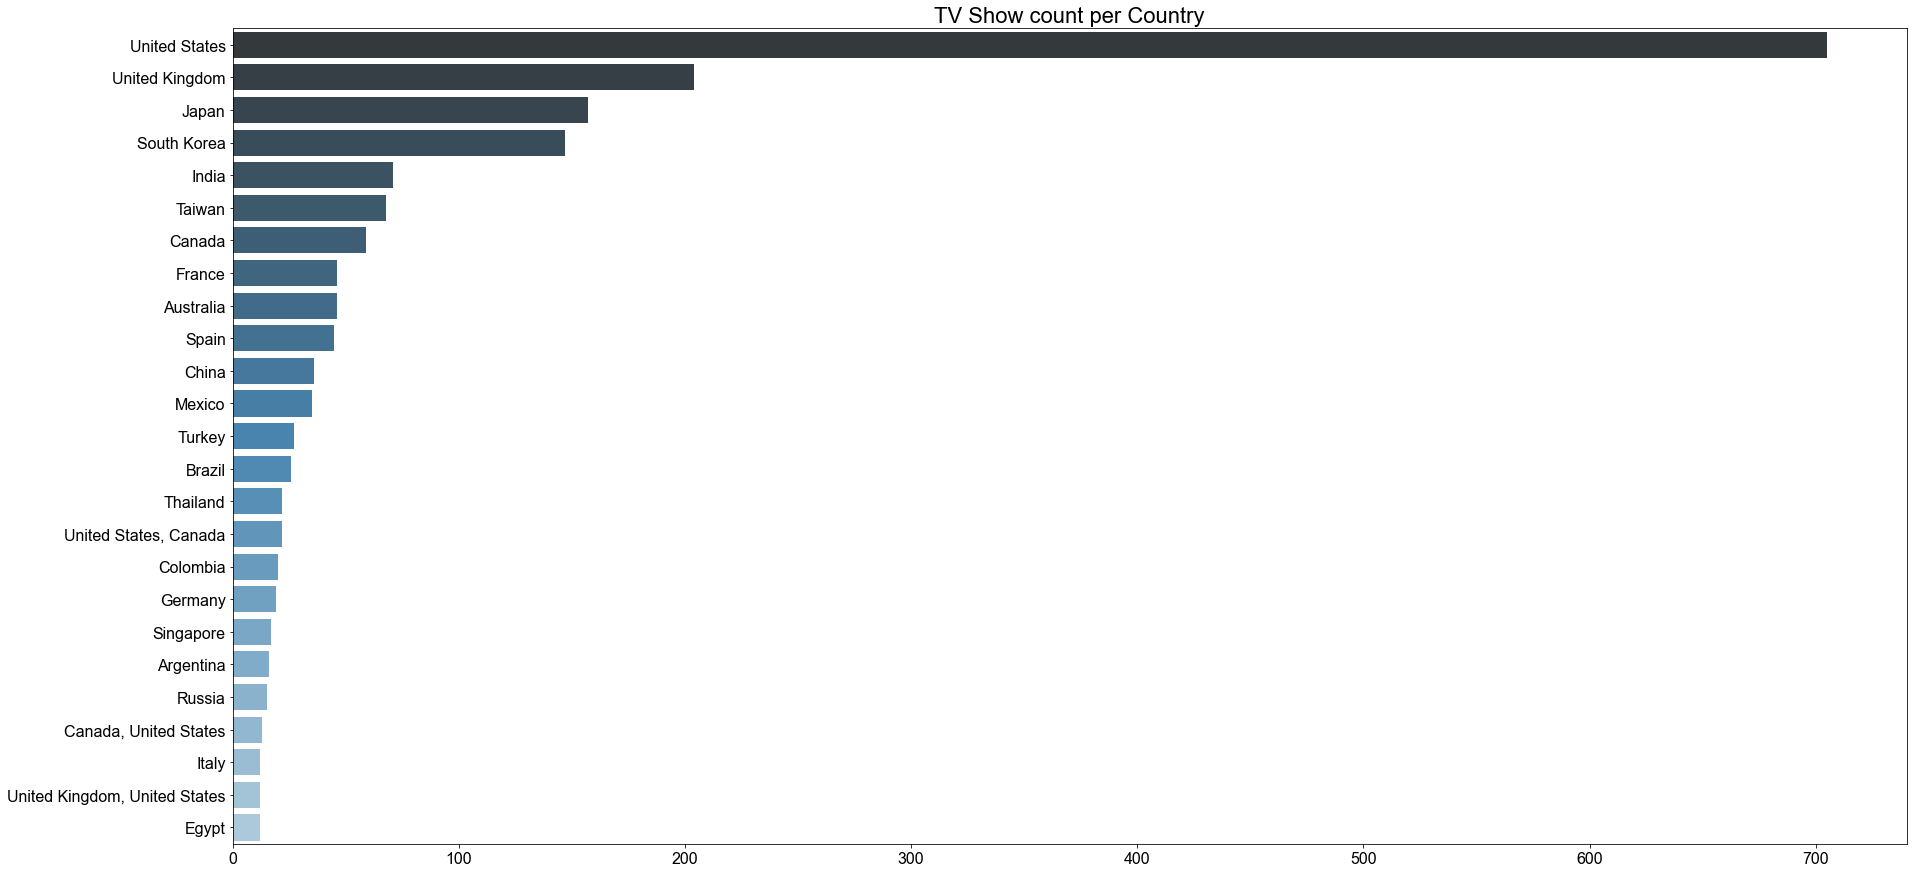

In [13]:
plt.figure(figsize = (30,15))
plt.title('TV Show count per Country', fontsize=22)
plt.tick_params(labelsize = 16)
sb.barplot(y = tv_country.index, x = tv_country.values, palette="Blues_d")
sb.set_style('white')
plt.show

In [14]:
movie_country = movies['country'].value_counts()[movies['country'].value_counts(normalize=True)>0.005]
movie_country_list = list(movie_country.index)

<function matplotlib.pyplot.show(close=None, block=None)>

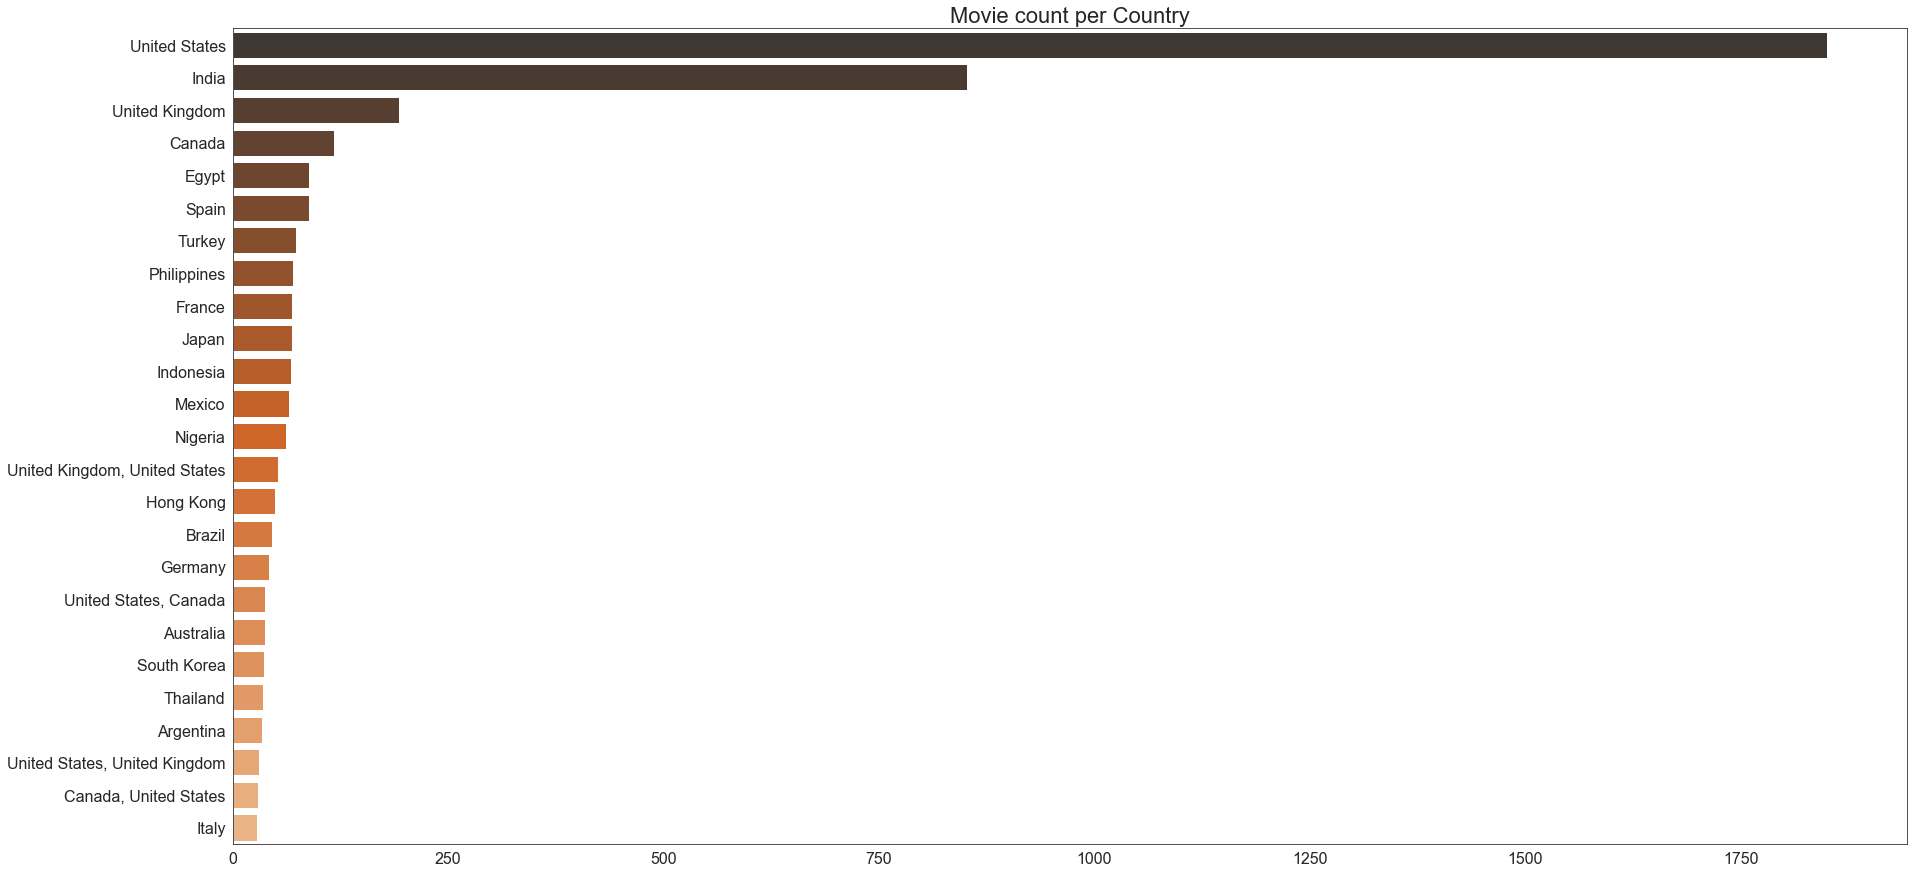

In [15]:
plt.figure(figsize = (30,15))
plt.title('Movie count per Country', fontsize=22)
plt.tick_params(labelsize = 16)
sb.barplot(y = movie_country.index, x = movie_country.values, palette="Oranges_d")
sb.set_style('white')
plt.show

In [16]:
tv_shows['type'].value_counts()

TV Show    2410
Name: type, dtype: int64

In [17]:
movies['type'].value_counts()

Movie    5377
Name: type, dtype: int64

In [18]:
# removing 'min' from duration so I can use as numeric and average
movies['duration'] = movies['duration'].replace({'min':''}, regex=True)

/Users/cameronmeadows/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
movies['duration'] = pd.to_numeric(movies['duration'])

/Users/cameronmeadows/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
tvrelease_year = tv_shows['release_year'].value_counts().sort_index()
print(tvrelease_year.head())
movierelease_year = movies['release_year'].value_counts().sort_index()
print(movierelease_year.head())

1925    1
1946    1
1963    1
1967    1
1968    1
Name: release_year, dtype: int64
1942    2
1943    3
1944    3
1945    3
1946    1
Name: release_year, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

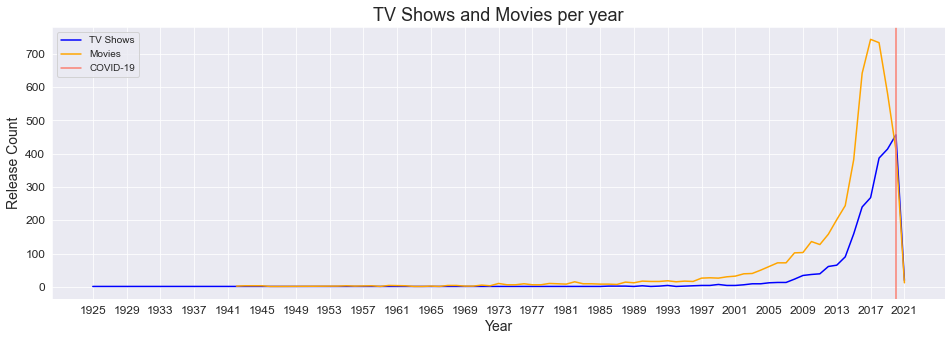

In [21]:
plt.figure(figsize = (16, 5))
sb.set_style('darkgrid')
plt.plot(tvrelease_year.index, tvrelease_year.values, color = 'b', label = 'TV Shows')
plt.plot(movierelease_year.index, movierelease_year.values, color = 'orange', label = 'Movies')

# showing the drop-off in production during 2020 due to COVID
plt.axvline(x = 2020, color = 'salmon', label = 'COVID-19')

plt.xticks(list(range(1925, 2022, 4)), fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('TV Shows and Movies per year', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Release Count', fontsize = 14)
plt.legend()
plt.show

In [22]:
tv_added = tv_shows['year'].value_counts().sort_index()
movie_added = movies['year'].value_counts().sort_index()

<function matplotlib.pyplot.show(close=None, block=None)>

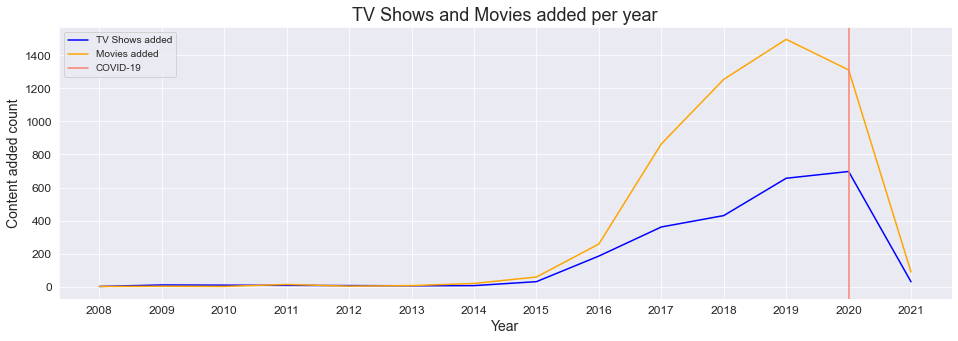

In [23]:
plt.figure(figsize = (16, 5))
sb.set_style('darkgrid')
plt.plot(tv_added.index, tv_added.values, color = 'b', label = 'TV Shows added')
plt.plot(movie_added.index, movie_added.values, color = 'orange', label = 'Movies added')

# showing the drop-off in production during 2020 due to COVID
plt.axvline(x = 2020, color = 'salmon', label = 'COVID-19')

plt.xticks(list(range(2008, 2022, 1)), fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('TV Shows and Movies added per year', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Content added count', fontsize = 14)
plt.legend()
plt.show

In [24]:
rel_dur = movies[['release_year','duration']]

In [25]:
avg_dur = rel_dur.groupby(pd.Grouper(key='release_year')).mean()
avg_dur = avg_dur.sort_index()

<function matplotlib.pyplot.show(close=None, block=None)>

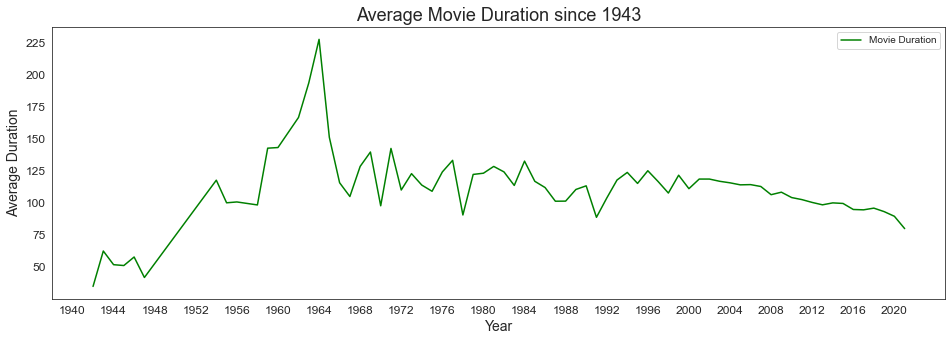

In [26]:
plt.figure(figsize = (16, 5))
sb.set_style('white')
plt.plot(avg_dur.index, avg_dur.values, color = 'green', label = 'Movie Duration')

plt.xticks(list(range(1940, 2022, 4)), fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Average Movie Duration since 1943', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Average Duration', fontsize = 14)
plt.legend()
plt.show